In [21]:
import numpy as np
import pandas as pd
from torch import tensor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from LinearModels import LinearRegression, LogisticRegression

In [3]:
from NeuralNet import ANN

# Test the Linear Regression Model

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
cal = fetch_california_housing()

In [6]:
cal_df = pd.DataFrame(cal['data'], columns=cal['feature_names'])
cal_df['target'] = cal['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cal_df.iloc[:, :-1], cal_df.iloc[:, -1], test_size=0.2, random_state=42)

In [8]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values

In [9]:
# standardize features
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [10]:
# standardize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

In [85]:
reg = LinearRegression(lr=0.001, max_iter=100000)
reg.fit(X_train, y_train)

In [ ]:
# predict on test set and inverse transform the standardized target
y_pred = reg.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
print(f'MSE: {(np.subtract(y_test, y_pred.flatten())**2).mean():.2f}')

MSE: 0.56


In [33]:
weight = pd.DataFrame(reg.weights, index=cal['feature_names'], columns=['Weights'])
weight.loc['bias', 'Weights'] = reg.bias
weight

,Weights
MedInc,0.855446
HouseAge,0.122800
AveRooms,-0.296253
AveBedrms,0.340721
Population,-0.002228
AveOccup,-0.040880
Latitude,-0.894156
Longitude,-0.867189
bias,2.071947


# Test Regressopm ANN

In [11]:
device = 'mps'
ann = ANN(input_size=X_train.shape[1], hidden_size=8, output_size=1, problem='regression')
ann.to(device)

ANN(
  (l1): Linear(in_features=8, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
X_train = tensor(X_train.astype(np.float32)).to(device)
y_train = tensor(y_train.astype(np.float32).reshape(-1, 1)).to(device)

In [13]:
ann.fit(X_train, y_train, max_iter=10000, lr=0.1)

Epoch [100/10000], Loss: 0.3590
Epoch [200/10000], Loss: 0.3342
Epoch [300/10000], Loss: 0.3231
Epoch [400/10000], Loss: 0.3138
Epoch [500/10000], Loss: 0.3056
Epoch [600/10000], Loss: 0.2981
Epoch [700/10000], Loss: 0.2915
Epoch [800/10000], Loss: 0.2858
Epoch [900/10000], Loss: 0.2815
Epoch [1000/10000], Loss: 0.2782
Epoch [1100/10000], Loss: 0.2758
Epoch [1200/10000], Loss: 0.2739
Epoch [1300/10000], Loss: 0.2721
Epoch [1400/10000], Loss: 0.2703
Epoch [1500/10000], Loss: 0.2688
Epoch [1600/10000], Loss: 0.2675
Epoch [1700/10000], Loss: 0.2664
Epoch [1800/10000], Loss: 0.2656
Epoch [1900/10000], Loss: 0.2649
Epoch [2000/10000], Loss: 0.2643
Epoch [2100/10000], Loss: 0.2646
Epoch [2200/10000], Loss: 0.2655
Epoch [2300/10000], Loss: 0.2652
Epoch [2400/10000], Loss: 0.2649
Epoch [2500/10000], Loss: 0.2652
Epoch [2600/10000], Loss: 0.2652
Epoch [2700/10000], Loss: 0.2641
Epoch [2800/10000], Loss: 0.2643
Epoch [2900/10000], Loss: 0.2642
Epoch [3000/10000], Loss: 0.2641
Epoch [3100/10000],

In [14]:
X_test = tensor(X_test.astype(np.float32)).to(device)

In [15]:
y_pred = ann.predict(X_test)
y_pred = y_pred.to('cpu').detach().numpy()

In [16]:
# y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(y_pred)

In [17]:
print(f'MSE: {(np.subtract(y_test, y_pred.flatten())**2).mean():.2f}')

MSE: 0.35


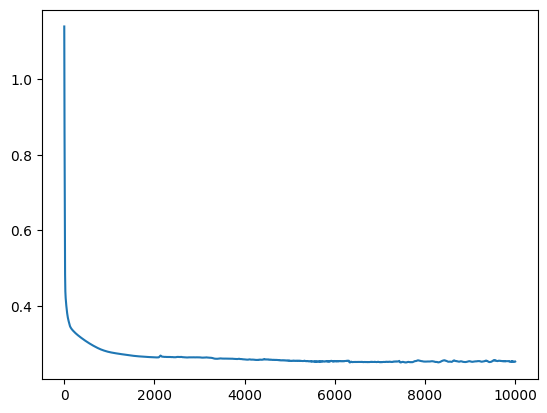

In [23]:
plt.plot(ann.loss)

# Test the Logistic Regression Model

In [24]:
from sklearn.datasets import load_breast_cancer

In [25]:
wisc = load_breast_cancer()

In [26]:
wisc_df = pd.DataFrame(wisc['data'], columns=wisc['feature_names'])
wisc_df['target'] = wisc['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(wisc_df.iloc[:,:-1], wisc_df.iloc[:,-1], test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
logreg = LogisticRegression(lr=0.01, max_iter=10000)
logreg.fit(X_train, y_train)

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
print(f"Accuracy: {np.mean(y_pred == y_test):.2f}")

Accuracy: 0.94


In [19]:
weight = pd.DataFrame(logreg.weights, index=wisc['feature_names'], columns=['Weights'])
weight.loc['bias', 'Weights'] = logreg.bias
weight

,Weights
mean radius,0.000036
mean texture,-0.000274
mean perimeter,0.000469
mean area,-0.000116
mean smoothness,-0.000047
mean compactness,0.003991
mean concavity,-0.001694
mean concave points,-0.002343
mean symmetry,0.000674
mean fractal dimension,-0.001515


# Test classification ANN

In [30]:
ann = ANN(X_train.shape[1], 8, 1, problem='classification')

In [31]:
device = 'mps'
ann.to(device)
X_train = tensor(X_train.astype(np.float32)).to(device)
y_train = tensor(y_train.values.astype(np.float32).reshape(-1, 1)).to(device)

In [32]:
ann.fit(X_train, y_train, max_iter=10000, lr=0.01)

Epoch [100/10000], Loss: 0.4364
Epoch [200/10000], Loss: 0.2934
Epoch [300/10000], Loss: 0.2147
Epoch [400/10000], Loss: 0.1714
Epoch [500/10000], Loss: 0.1455
Epoch [600/10000], Loss: 0.1285
Epoch [700/10000], Loss: 0.1166
Epoch [800/10000], Loss: 0.1076
Epoch [900/10000], Loss: 0.1007
Epoch [1000/10000], Loss: 0.0953
Epoch [1100/10000], Loss: 0.0908
Epoch [1200/10000], Loss: 0.0870
Epoch [1300/10000], Loss: 0.0838
Epoch [1400/10000], Loss: 0.0811
Epoch [1500/10000], Loss: 0.0786
Epoch [1600/10000], Loss: 0.0765
Epoch [1700/10000], Loss: 0.0745
Epoch [1800/10000], Loss: 0.0727
Epoch [1900/10000], Loss: 0.0711
Epoch [2000/10000], Loss: 0.0696
Epoch [2100/10000], Loss: 0.0682
Epoch [2200/10000], Loss: 0.0669
Epoch [2300/10000], Loss: 0.0658
Epoch [2400/10000], Loss: 0.0647
Epoch [2500/10000], Loss: 0.0636
Epoch [2600/10000], Loss: 0.0626
Epoch [2700/10000], Loss: 0.0617
Epoch [2800/10000], Loss: 0.0609
Epoch [2900/10000], Loss: 0.0601
Epoch [3000/10000], Loss: 0.0593
Epoch [3100/10000],

In [33]:
X_test = tensor(X_test.astype(np.float32)).to(device)

In [34]:
y_pred = ann.predict(X_test)

In [35]:
y_pred = (y_pred > 0.5).int().flatten().to('cpu').numpy()

In [36]:
print(f"Accuracy: {np.mean(y_pred == y_test.values.flatten()):.2f}")

Accuracy: 0.99


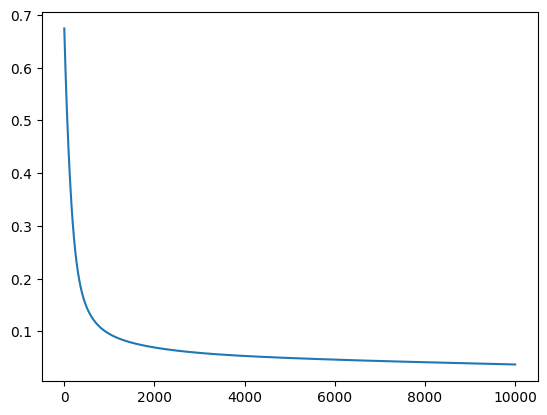

In [37]:
plt.plot(ann.loss)